In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
first_df = pd.read_csv('final_file_Title_Desc_KeyWork.csv')

In [3]:
first_df.head()

,Webpage_id,Domain,Url,Tag,Title,Meta Description,Meta Keywords
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry..."
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry..."
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry..."
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry..."
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry..."


In [4]:
second_df = pd.read_csv('title.csv')

In [5]:
second_df.head()

,title,Webpage_id
0,"[""Tecfidera, Gilenya and Aubagio's 3-way battl...",1
1,['Novo equipped to weather the storm in the U....,2
2,"[""Another exec departs troubled Endo--and this...",3
3,"[""Would Teva buy Korea's Celltrion to beef up ...",4
4,['Restasis-maker Allergan recruits actress Mar...,5


In [6]:
second_df['title'] = second_df['title'].apply(lambda x: x.replace(r'\'',""))

In [7]:
main_df = first_df.merge(second_df)

In [8]:
main_df.drop(["Webpage_id"],axis=1,inplace=True)
main_df.head()

,Domain,Url,Tag,Title,Meta Description,Meta Keywords,title
0,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Tecfidera, Gilenya and Aubagio's 3-way battl..."
1,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...",['Novo equipped to weather the storm in the U....
2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Another exec departs troubled Endo--and this..."
3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Would Teva buy Korea's Celltrion to beef up ..."
4,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...",['Restasis-maker Allergan recruits actress Mar...


In [9]:
main_df['url_split'] = main_df['Url'].apply(lambda x : x.split("/")[3:])

In [10]:
split_url_string = []
for counter in range(len(main_df)):
    row = main_df.iloc[counter]
    text = ""
    for link in row.url_split:
        text += " "+link
    split_url_string.append(text)
main_df['url_split_str'] = pd.DataFrame(split_url_string)

In [11]:
main_df.drop(["url_split"],axis=1,inplace=True)
main_df.head()

,Domain,Url,Tag,Title,Meta Description,Meta Keywords,title,url_split_str
0,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Tecfidera, Gilenya and Aubagio's 3-way battl...",marketing tecfidera-gilenya-and-aubagio-s-3-w...
1,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...",['Novo equipped to weather the storm in the U....,pharma novo-equipped-to-weather-storm-u-s-dia...
2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Another exec departs troubled Endo--and this...",pharma another-exec-departs-troubled-endo-and...
3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...","[""Would Teva buy Korea's Celltrion to beef up ...",pharma teva-buy-biosim-specialist-celltrion-i...
4,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news,Pharma News | Pharma Industry | Pharmaceutical...,Visit FiercePharma for pharma industry news on...,"pharmaceutical company,pharmaceutical industry...",['Restasis-maker Allergan recruits actress Mar...,marketing actress-marissa-tomei-partners-alle...


In [12]:
actual_df = main_df [~(main_df['Title'].isnull() & main_df['Meta Description'].isnull() & main_df['Meta Keywords'].isnull())]

In [13]:
actual_df['url_len'] = actual_df['Url'].apply(len)
actual_df = actual_df.reset_index(drop=True)

In [14]:
actual_df['category_id'] = actual_df['Tag'].factorize()[0]
category_id_df = actual_df[['Tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Tag']].values)

In [15]:
import numpy as np
actual_df = actual_df.reindex(np.random.permutation(actual_df.index))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfid vectorize
tfidf1 = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1',ngram_range=(1, 2), stop_words='english',lowercase =True,analyzer='word',max_features=500)
tfidf2 = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',lowercase =True,analyzer='word',max_features=500)
tfidf3 = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',lowercase =True,analyzer='word',max_features=500)
tfidf4 = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',lowercase =True,analyzer='word',max_features=500)
tfidf5 = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',lowercase =True,analyzer='word',max_features=500)

# feature transformation

features1 = tfidf1.fit_transform(actual_df.Title.astype('U')).toarray()
features2 = tfidf2.fit_transform(actual_df.url_split_str.astype('U')).toarray()
features3 = tfidf3.fit_transform(actual_df['Meta Description'].astype('U')).toarray()
features4 = tfidf4.fit_transform(actual_df['Meta Keywords'].astype('U')).toarray()
features5 = tfidf5.fit_transform(actual_df.title.astype('U')).toarray()
# features = pd.concat([pd.DataFrame(features1),pd.DataFrame(features2),pd.DataFrame(features3),url_len],axis=1,ignore_index=True)
features = pd.concat([pd.DataFrame(features1),pd.DataFrame(features2),pd.DataFrame(features3),pd.DataFrame(features4),pd.DataFrame(features5),actual_df['url_len']],axis=1,ignore_index=True)
labels = actual_df.category_id
features.shape

(49020, 2501)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     KNeighborsClassifier(n_neighbors = 7),
    MultinomialNB()
#     SVC(kernel = 'linear',C = 1),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
MultinomialNB    0.852019
Name: accuracy, dtype: float64

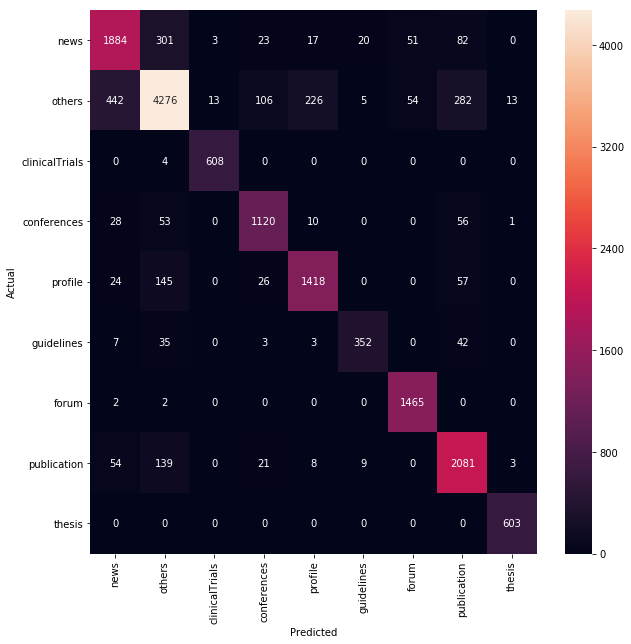

In [20]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, actual_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Tag.values, yticklabels=category_id_df.Tag.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()